In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 68.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 73.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/waterQuality/all4classes.csv')
data_train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,body,Subjectivity,Polarity,Analysis,cod
0,0,0,0,predatory white pointers dingos saltwatercrocs...,0.075066,0.075066,Positive,0
1,1,1,1,this january simply note that are still having...,0.000000,0.000000,Neutral,0
2,2,2,2,pronouns hehim height zodiac sign leo smoke he...,0.000000,0.000000,Neutral,0
3,3,3,3,pronouns hehim height zodiac sign sagittarius ...,-0.075000,-0.075000,Negative,0
4,4,4,4,hoses are inchworm water lilies are powderblue...,-0.166667,-0.166667,Negative,0


In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [6]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['body'],\
                                                      data_train['cod'],\
                                                      test_size=0.2,\
                                                      random_state=0)

In [9]:
# Building model with transformer
model_name = 'google/electra-small-discriminator'

trans = text.Transformer(model_name, maxlen=128)

In [10]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 44


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 44


In [12]:
# getting electra-base model.
model = trans.get_classifier()

In [20]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 32)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
2643/2643 [==============================] - 217s 74ms/step - loss: 1.3866 - accuracy: 0.2502
Epoch 2/6
2643/2643 [==============================] - 193s 73ms/step - loss: 1.3844 - accuracy: 0.2685
Epoch 3/6
2643/2643 [==============================] - 187s 71ms/step - loss: 1.0617 - accuracy: 0.5383
Epoch 4/6
2643/2643 [==============================] - 186s 70ms/step - loss: 1.2438 - accuracy: 0.3751
Epoch 5/6
2643/2643 [==============================] - 185s 70ms/step - loss: 24.4993 - accuracy: 0.2691


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


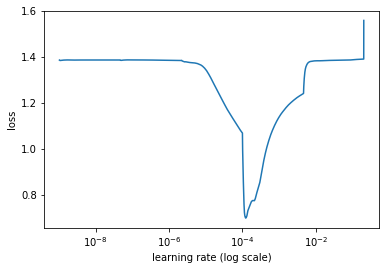

In [14]:
learner.lr_find(start_lr=1e-09, max_epochs=6)
learner.lr_plot()

In [22]:
history = learner.fit_onecycle(1e-4, 4)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/4
496/496 [==============================] - 103s 202ms/step - loss: 1.2405 - accuracy: 0.4481 - val_loss: 0.8985 - val_accuracy: 0.6401
Epoch 2/4
496/496 [==============================] - 100s 196ms/step - loss: 0.6924 - accuracy: 0.7655 - val_loss: 0.4983 - val_accuracy: 0.8159
Epoch 3/4
496/496 [==============================] - 100s 196ms/step - loss: 0.4715 - accuracy: 0.8253 - val_loss: 0.4649 - val_accuracy: 0.8245
Epoch 4/4
496/496 [==============================] - 99s 194ms/step - loss: 0.4059 - accuracy: 0.8472 - val_loss: 0.4428 - val_accuracy: 0.8262


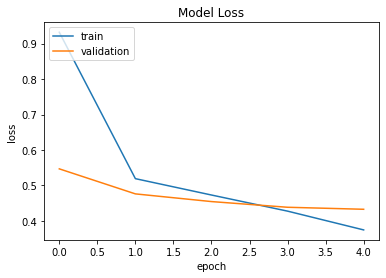

In [16]:
learner.plot('loss')

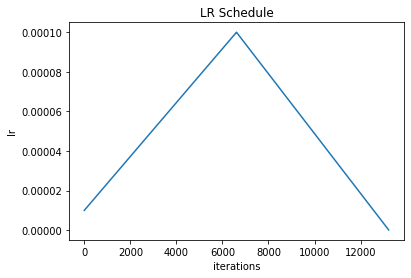

In [17]:
learner.plot('lr')

In [18]:
learner.validate()

124/124 [==============================] - 11s 69ms/step
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       972
           1       0.92      0.90      0.91       996
           2       0.91      0.74      0.81      1091
           3       0.72      0.89      0.80       906

    accuracy                           0.83      3965
   macro avg       0.83      0.83      0.83      3965
weighted avg       0.84      0.83      0.83      3965



array([[768,  29,  47, 128],
       [ 48, 901,  15,  32],
       [109,  25, 804, 153],
       [ 52,  26,  18, 810]])

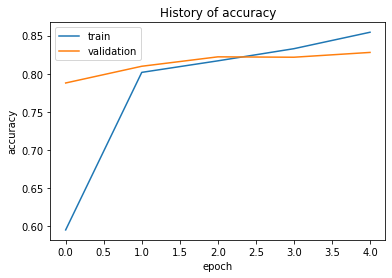

In [19]:
learner.plot('accuracy')